Steane [[7,1,3]] code

In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.result import marginal_distribution
from qiskit.circuit.library import UGate
import qiskit.quantum_info as qi
from numpy import pi, random, sqrt
import numpy as np
from qiskit.quantum_info import Statevector, Operator

In [178]:
state = QuantumRegister(7,  name="|ψ>")


In [179]:
circuit = QuantumCircuit(state)
circuit.u(theta = random.random() * 2 * pi,
    phi = random.random() * 2 * pi,
    lam = random.random() * 2 * pi,
    qubit = state[0])

Encoding step

In [180]:
circuit.h(state[4:])

circuit.cx(state[0], [state[1],state[2]])
circuit.cx(state[6], [state[0], state[1], state[3]])
circuit.cx(state[5], [state[0], state[2], state[3]])
circuit.cx(state[4], [state[1], state[2], state[3]])

In [181]:
e_state = qi.Statevector.from_instruction(circuit)
#state.draw(output="latex")

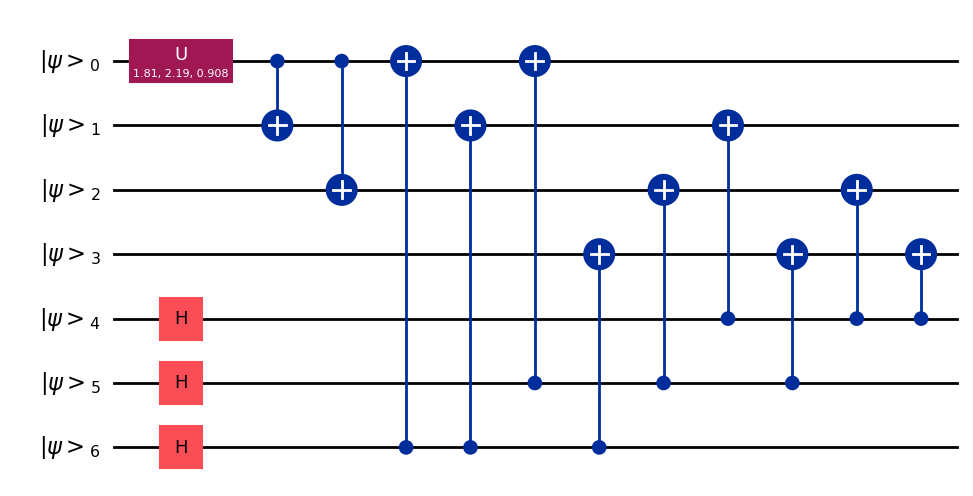

In [182]:
display(circuit.draw(output='mpl'))

In [183]:
p_I_x = 0.4
p_I_z = 0.4
def error_gate_x(qubit):
    rand_num = random.random()
    if rand_num >= p_I_x:
        circuit.x(qubit)

def error_gate_z(qubit):
    rand_num = random.random()
    if rand_num >= p_I_z:
        circuit.z(qubit)

In [184]:
choice = random.randint(0,7)
error_gate_x(state[choice])
error_gate_z(state[choice])

In [185]:
ancilla = QuantumRegister(6, name="A")

syndrome = ClassicalRegister(6, name="S")

circuit.add_register(ancilla)
circuit.add_register(syndrome)

In [186]:
circuit.barrier()

for i in range(0,7,2):
    circuit.cx(state[i], ancilla[0])

circuit.barrier()

circuit.cx([state[1], state[2], state[5], state[6]], ancilla[1])

circuit.barrier()

for j in range(3,7):
    circuit.cx(state[j], ancilla[2])



In [187]:
circuit.barrier()

circuit.h(ancilla[3:])

for i in range(0,7,2):
    circuit.cx(ancilla[3], state[i])

circuit.barrier()

circuit.cx(ancilla[4],[state[1], state[2], state[5], state[6]])

circuit.barrier()

for j in range(3,7):
    circuit.cx(ancilla[5], state[j])

circuit.barrier()

circuit.h(ancilla[3:])


In [188]:
circuit.barrier()
circuit.measure(ancilla, syndrome)

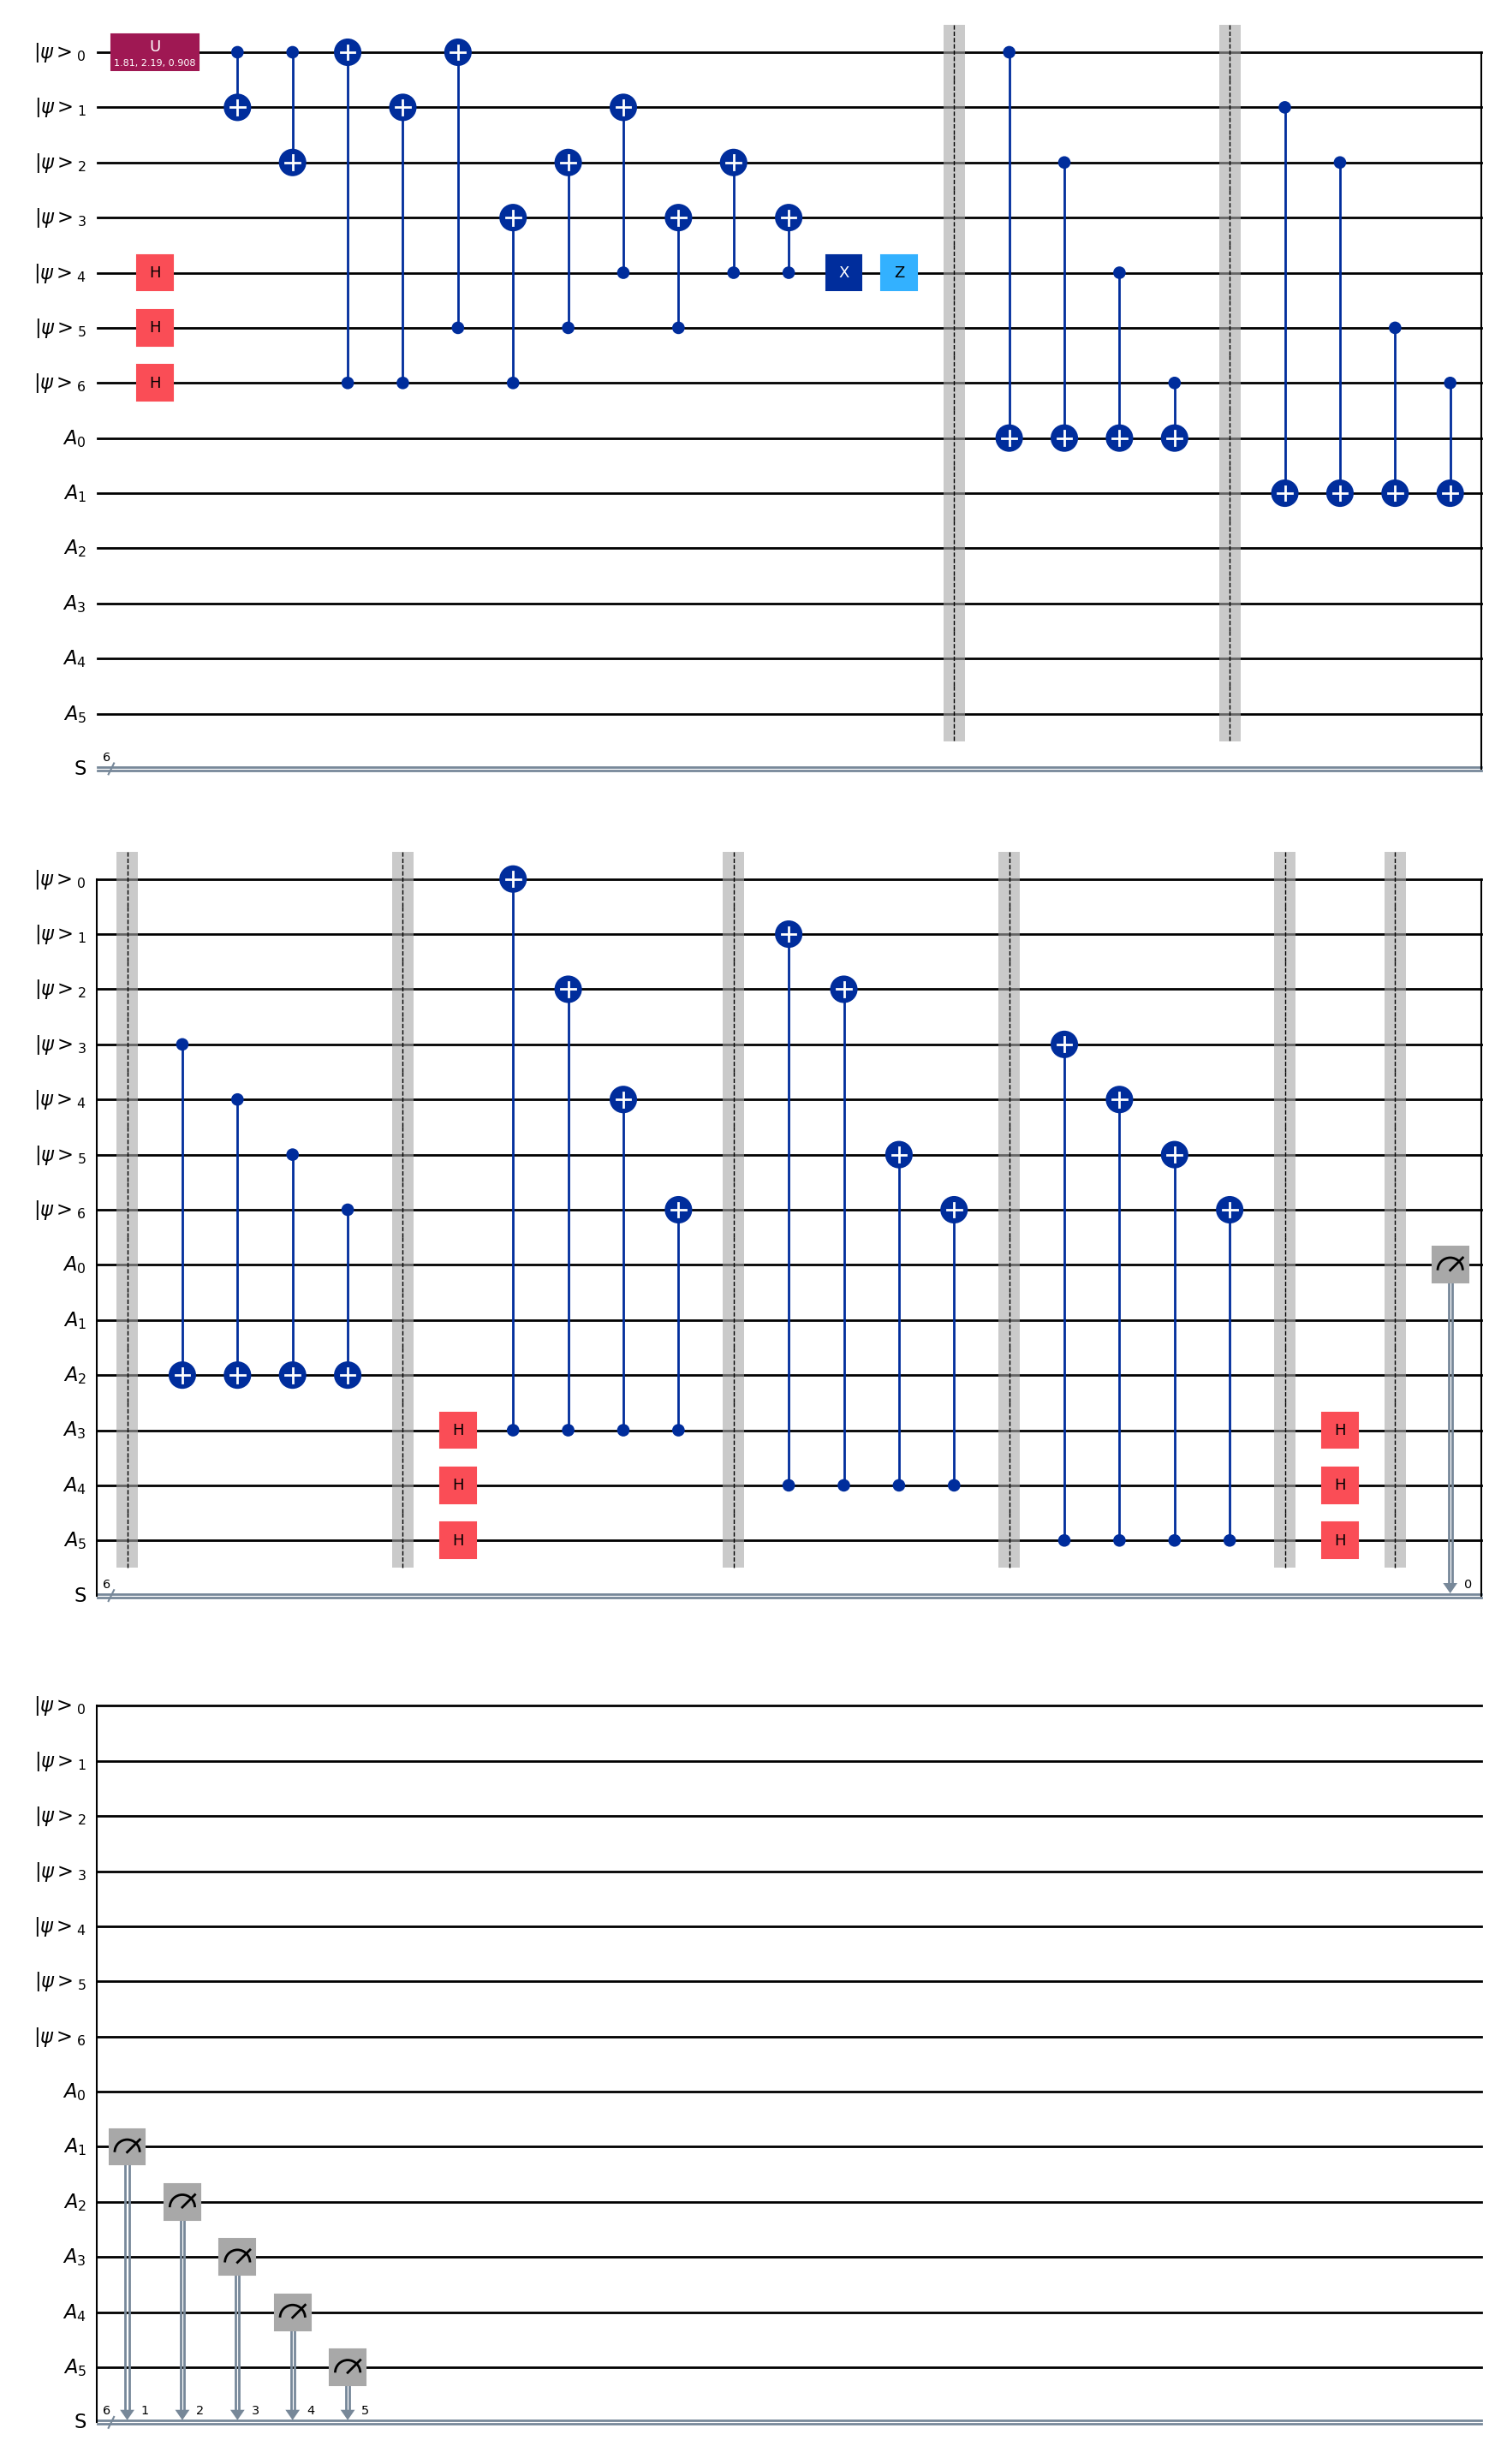

In [189]:
display(circuit.draw(output='mpl'))

In [190]:
result = AerSimulator().run(circuit).result()
statistics = result.get_counts()
synd = bin(0)
for k,v in statistics.items():
    print(k)
    synd = k

101101
